In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as mo
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm , skew
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df= pd.read_csv('cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.drop(columns='Unnamed: 32',inplace=True,axis=1)

In [9]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

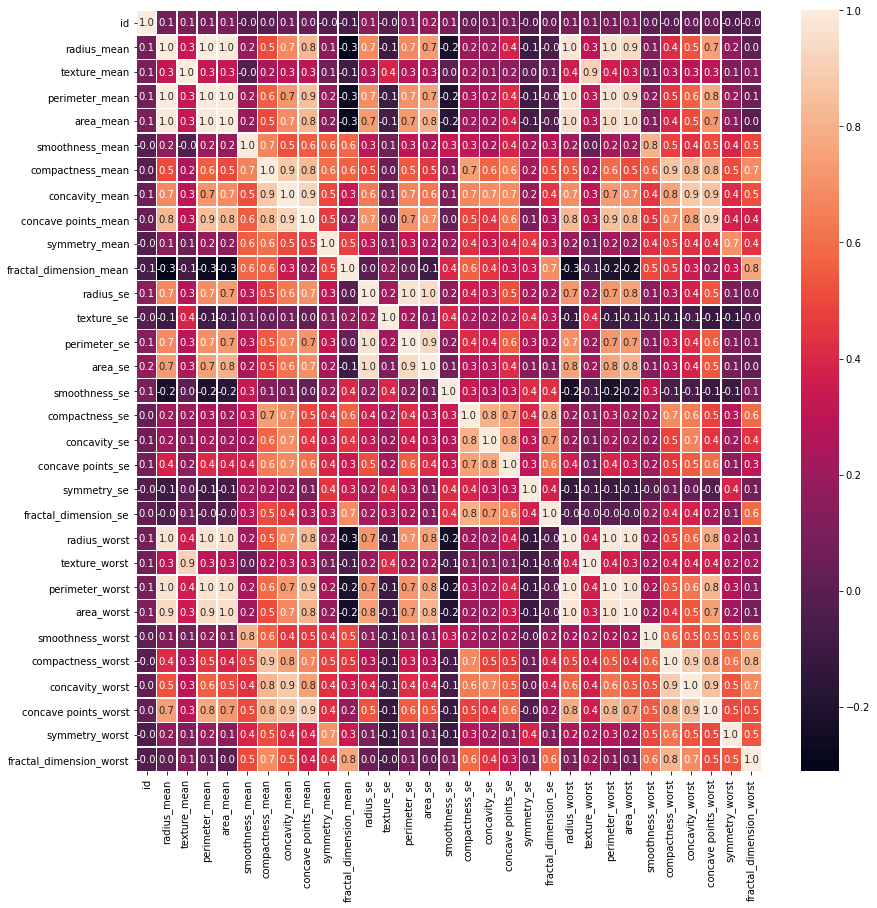

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sb.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [11]:
X=df.drop(labels='diagnosis',axis=1)
y=df[['diagnosis']]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [14]:
select_feature.scores_

array([1.32358390e+08, 1.77946492e+02, 6.06916433e+01, 1.34061092e+03,
       3.66899557e+04, 1.00015175e-01, 3.41839493e+00, 1.30547650e+01,
       7.09766457e+00, 1.95982847e-01, 3.42575072e-04, 2.45882967e+01,
       4.07131026e-02, 1.72696840e+02, 6.12741067e+03, 1.32470372e-03,
       3.74071521e-01, 6.92896719e-01, 2.01587194e-01, 1.39557806e-03,
       2.65927071e-03, 3.25782599e+02, 1.16958562e+02, 2.40512835e+03,
       7.50217341e+04, 2.63226314e-01, 1.19077581e+01, 2.58858117e+01,
       8.90751003e+00, 1.00635138e+00, 1.23087347e-01])

In [15]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [1.32358390e+08 1.77946492e+02 6.06916433e+01 1.34061092e+03
 3.66899557e+04 1.00015175e-01 3.41839493e+00 1.30547650e+01
 7.09766457e+00 1.95982847e-01 3.42575072e-04 2.45882967e+01
 4.07131026e-02 1.72696840e+02 6.12741067e+03 1.32470372e-03
 3.74071521e-01 6.92896719e-01 2.01587194e-01 1.39557806e-03
 2.65927071e-03 3.25782599e+02 1.16958562e+02 2.40512835e+03
 7.50217341e+04 2.63226314e-01 1.19077581e+01 2.58858117e+01
 8.90751003e+00 1.00635138e+00 1.23087347e-01]
Feature list: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'c

In [16]:
'''


x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))

'''

"\n\n\nx_train_2 = select_feature.transform(x_train)\nx_test_2 = select_feature.transform(x_test)\n#random forest classifier with n_estimators=10 (default)\nclf_rf_2 = RandomForestClassifier()      \nclr_rf_2 = clf_rf_2.fit(x_train_2,y_train)\nac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))\nprint('Accuracy is: ',ac_2)\ncm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))\n\n"

In [17]:
df.drop(columns='id',axis=1,inplace=True)

In [18]:
df.corr().T

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [19]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst']
new_df = df.drop(drop_list ,axis = 1 ) 

In [20]:
new_df.head(5)

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [21]:
new_df.columns

Index(['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst'],

In [ ]:
['diagnosis','concave points_worst','perimeter_worst','concave points_mean',
 'radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean',
 'concavity_worst','compactness_mean','compactness_worst','radius_se',
 'perimeter_se','area_se','texture_worst']


In [22]:
new_df.corr()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
texture_mean,1.000000,0.321086,-0.023389,0.302418,0.071401,-0.076437,0.386358,0.259845,0.006614,0.143293,0.009127,0.054458,0.077503,0.301025,0.105008,0.119205
area_mean,0.321086,1.000000,0.177028,0.685983,0.151293,-0.283110,-0.066280,0.800086,-0.166777,0.207660,-0.072497,-0.019887,0.123523,0.512606,0.143570,0.003738
smoothness_mean,-0.023389,0.177028,1.000000,0.521984,0.557775,0.584792,0.068406,0.246552,0.332375,0.248396,0.200774,0.283607,0.805324,0.434926,0.394309,0.499316
concavity_mean,0.302418,0.685983,0.521984,1.000000,0.500667,0.336783,0.076218,0.617427,0.098564,0.691270,0.178009,0.449301,0.448822,0.884103,0.409464,0.514930
symmetry_mean,0.071401,0.151293,0.557775,0.500667,1.000000,0.479921,0.128053,0.223970,0.187321,0.342627,0.449137,0.331786,0.426675,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.076437,-0.283110,0.584792,0.336783,0.479921,1.000000,0.164174,-0.090170,0.401964,0.446630,0.345007,0.688132,0.504942,0.346234,0.334019,0.767297
texture_se,0.386358,-0.066280,0.068406,0.076218,0.128053,0.164174,1.000000,0.111567,0.397243,0.194998,0.411621,0.279723,-0.073658,-0.068956,-0.128215,-0.045655
area_se,0.259845,0.800086,0.246552,0.617427,0.223970,-0.090170,0.111567,1.000000,0.075150,0.270895,0.134109,0.127071,0.125389,0.385100,0.074126,0.017539
smoothness_se,0.006614,-0.166777,0.332375,0.098564,0.187321,0.401964,0.397243,0.075150,1.000000,0.268685,0.413506,0.427374,0.314457,-0.058298,-0.107342,0.101480
concavity_se,0.143293,0.207660,0.248396,0.691270,0.342627,0.446630,0.194998,0.270895,0.268685,1.000000,0.309429,0.727372,0.168481,0.662564,0.197788,0.439329


In [23]:
a={}
Score_list= [1.32358390e+08, 1.77946492e+02, 6.06916433e+01, 1.34061092e+03,
 3.66899557e+04, 1.00015175e-01, 3.41839493e+00, 1.30547650e+01,
 7.09766457e+00, 1.95982847e-01, 3.42575072e-04, 2.45882967e+01,
 4.07131026e-02 ,1.72696840e+02, 6.12741067e+03, 1.32470372e-03,
 3.74071521e-01 ,6.92896719e-01, 2.01587194e-01, 1.39557806e-03,
 2.65927071e-03, 3.25782599e+02, 1.16958562e+02, 2.40512835e+03,
 7.50217341e+04 ,2.63226314e-01 ,1.19077581e+01 ,2.58858117e+01,
 8.90751003e+00 ,1.00635138e+00, 1.23087347e-01]

Feature_list=['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for  i in Score_list:
    for j in Feature_list:
        a[i]=j
        Feature_list.remove(j)
        break
print()

In [24]:
##columns to select as they have the least corelation with other vaiables 
#  ['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean',
#    'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
#    'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
#   'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
#   'symmetry_worst', 'fractal_dimension_worst']

In [25]:
#k means  clustering  without libraries 


In [26]:
X_new=new_df.drop(labels ='diagnosis',axis=1)
y_new=new_df['diagnosis']

In [27]:
new_df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [28]:
#data = new_df.values[1,1:]
#category = df.values[0,: ]

In [29]:
data = df.values[:, 1:]
category = df.values[:,0]

In [30]:
print(data)

[[17.99 10.38 122.8 ... 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ... 0.18600000000000003 0.275 0.08902]
 [19.69 21.25 130.0 ... 0.243 0.3613 0.08757999999999999]
 ...
 [16.6 28.08 108.3 ... 0.1418 0.2218 0.0782]
 [20.6 29.33 140.1 ... 0.265 0.4087 0.124]
 [7.76 24.54 47.92 ... 0.0 0.2871 0.07039]]


In [31]:
print(category)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [32]:
new_df["diagnosis"] = pd.Categorical(new_df["diagnosis"])
new_df["diagnosis"] = new_df["diagnosis"].cat.codes
# Change dataframe to numpy matrix
data = new_df.values[:, 1:]
category = new_df.values[:,0]

# K means ALgorithm WIthout Sklearn Library

In [48]:
k = 2
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]
data = np.array(data, dtype=np.float64) 
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'red']
for i in range(n):
   # c= sum(data[i, 0])
    #d= sum(category[i])
    my_array = np.linspace(data[i, 0])
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
    
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
print('the Number of element in cluster is ',(c))
print('the Number of element in cluster is ',(d))

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

In [ ]:
from copy import deepcopy
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new  

In [ ]:
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# Kmediod Algorithm without sklearn library 


In [ ]:
# Imports
#from graphics import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# Dataset
#iris = datasets.load_iris()
data = new_df
print(data)
target = data.diagnosis
labels = data.diagnosis
print(target)
print(labels)
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

#PCA Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k = 2

#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
 
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints, 3)

def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1: 
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S
  
S = compute_d_p(datapoints, medoids_initial, 2)


def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)

def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity= np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
    return out_medoids

def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])
  
#Full algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids,labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

#Count
def mark_matches(a, b, exact=False):
    """
    Given two Numpy arrays of {0, 1} labels, returns a new boolean
    array indicating at which locations the input arrays have the
    same label (i.e., the corresponding entry is True).
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as the same up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int == 2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

def count_matches(a, b, exact=False):
    """
    Given two sets of {0, 1} labels, returns the number of mismatches.
    
    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as similar up to a swapping of the labels. This feature
    allows
    
      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]
      
    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
      "matches out of",
      len(data), "data points",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(labels)))

In [ ]:
X = new_df.values[:, 1:]
category = new_df.values[:,0]

# Hierarchial Algommerative Algorithm Without Sklearn 

In [ ]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [ ]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')
    break

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

# DbScaN Algorithm without sckit learn 

In [ ]:
#dbscan Algorithm from scratch

In [ ]:
eps = 0.2
minpts = 3
X=  new_df.values[:, 1:]
target = new_df.diagnosis 
cluster_val=2
def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(X[:,0],X[:,1],c=target,s=50,cmap = 'inferno');

In [ ]:
eps = 0.2
minpts = 6
X =  new_df.values[:, 1:]
target = new_df.diagnosis 
def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(X[:,0],X[:,1],c=target,s=50,cmap = 'cividis');

In [ ]:
eps = 0.5
minpts = 6
X=  new_df.values[:, 1:]
target = new_df.diagnosis 
def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = [0,1]
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(X[:,0],X[:,1],c=target,  s=50,cmap = 'PuOr_r');

In [ ]:
new_df

# DbScaN Algorithm with sckit learn Libraries

In [ ]:
from sklearn.cluster import DBSCAN
 
#X
X = new_df.values[:, 1:]
target = new_df.diagnosis
dbscan = DBSCAN(eps = 0.2,min_samples=6,).fit(new_df)
dbscanlabels = new_df.diagnosis	
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("CLUSTERING USING DBSCAN(FROM SKLEARN'S LIBRARY)")
ax.scatter(X[:,0],X[:,1],c=dbscanlabels,s=50,cmap = 'cividis');